# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **UPLOAD DATASET**

In [ ]:
uploaded = files.upload()

Saving Ecommerce_Delivery_Analytics_New.csv to Ecommerce_Delivery_Analytics_New (2).csv


# **READ DATASET**

In [ ]:
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


# **DATA PREPROCESSING**

**DROP COLUMNS**

In [ ]:
df = df.drop(columns=['Order ID','Customer ID'])
df

,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...
99995,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


**DISPLAY DATA TYPE INFORMATION AND NON-NULL COUNT**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Platform                 100000 non-null  object
 1   Order Date & Time        100000 non-null  object
 2   Delivery Time (Minutes)  100000 non-null  int64 
 3   Product Category         100000 non-null  object
 4   Order Value (INR)        100000 non-null  int64 
 5   Customer Feedback        100000 non-null  object
 6   Service Rating           100000 non-null  int64 
 7   Delivery Delay           100000 non-null  object
 8   Refund Requested         100000 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.9+ MB


**DISPLAY DESCRIPTIVE STATISTICS**

In [ ]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


**IDENTIFY MISSING VALUE**

In [ ]:
df.isnull().sum()

,0
Platform,0
Order Date & Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0
Refund Requested,0


**TRANSFORM CATEGORICAL DATA INTO NUMERICAL DATA**

In [ ]:
label_encoder = LabelEncoder()
categorical_columns =  ['Platform', 'Order Date & Time', 'Product Category', 'Customer Feedback','Service Rating','Delivery Delay','Refund Requested']
for col in categorical_columns :
    df[col] = label_encoder.fit_transform(df[col])


**SPLITTING FEATURES AND TARGET**

In [ ]:
X = df[['Platform', 'Order Date & Time', 'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)', 'Service Rating', 'Delivery Delay']]
y = df['Refund Requested']

In [ ]:
X

,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Service Rating,Delivery Delay
0,1,19,30,2,382,4,0
1,0,54,16,1,279,4,0
2,1,21,25,0,599,1,0
3,1,19,42,0,946,1,1
4,0,49,30,0,334,4,0
...,...,...,...,...,...,...,...
99995,1,49,24,1,289,2,0
99996,1,18,19,5,322,3,0
99997,1,27,41,1,135,4,1
99998,1,14,31,3,973,4,0


In [ ]:
y

,Refund Requested
0,0
1,0
2,1
3,1
4,0
...,...
99995,0
99996,0
99997,0
99998,0


# **HANDLING IMBALANCE DATA USING SMOTE**

**CLASS DISTRIBUTION BEFORE SMOTE**

In [ ]:
print("Class Distribution Before Resampling:")
print(df['Refund Requested'].value_counts())

Class Distribution Before Resampling:
Refund Requested
0    54181
1    45819
Name: count, dtype: int64


**CLASS DISTRIBUTION BEFORE SOTE VISUALIZATION**

<ipython-input-86-db47e9284abe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


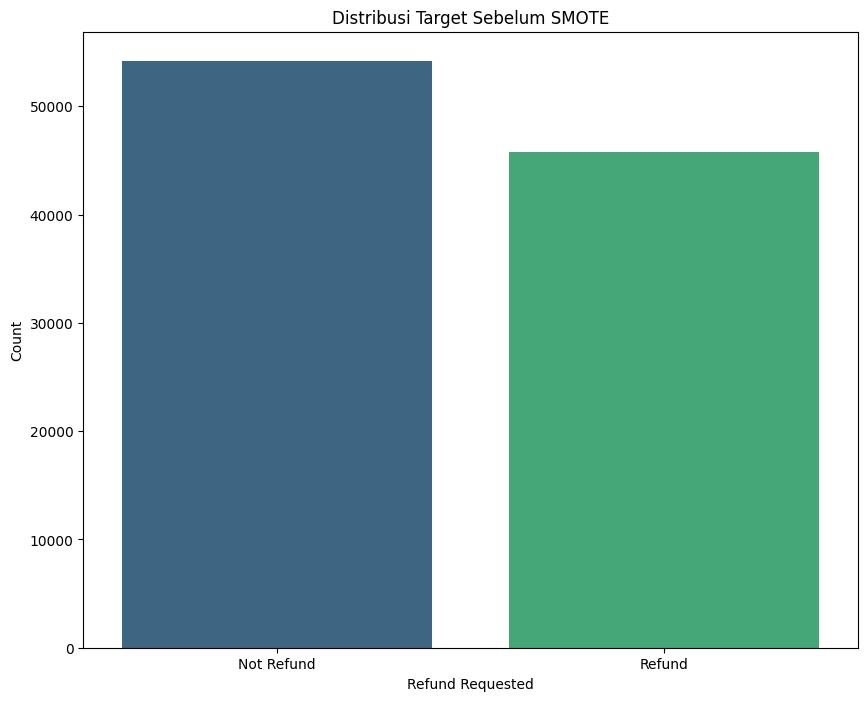

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y, palette='viridis')
plt.title("Distribusi Target Sebelum SMOTE")
plt.xlabel("Refund Requested")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Not Refund', 'Refund'])
plt.show()

# **FEATURE ENGINEERING**

In [ ]:
X_resampled['Delivery Time (Minutes)'] = X_resampled['Delivery Time (Minutes)'] / (X_resampled['Service Rating'] + 1)
X_resampled['Order Value (INR)'] = X_resampled['Order Value (INR)'] / (X_resampled['Delivery Time (Minutes)'] + 1)
X_resampled['Log_Order Value (INR)'] = np.log1p(X_resampled['Order Value (INR)'])
X_resampled['Log_Delivery Time (Minutes)'] = np.log1p(X_resampled['Delivery Time (Minutes)'])

In [ ]:
X_resampled

,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Service Rating,Delivery Delay,Log_Order Value (INR),Log_Delivery Time (Minutes)
0,1,19,1.20,2,24.805195,4,0,3.250576,0.788457
1,0,54,0.64,1,40.505226,4,0,3.725819,0.494696
2,1,21,6.25,0,6.120051,1,0,1.962915,1.981001
3,1,19,10.50,0,3.739130,1,1,1.555854,2.442347
4,0,49,1.20,0,21.688312,4,0,3.121850,0.788457
...,...,...,...,...,...,...,...,...,...
108357,0,31,32.00,3,1.146924,0,0,0.764036,3.496508
108358,0,31,6.50,3,12.542857,1,0,2.605859,2.014903
108359,0,47,31.00,4,1.753906,0,0,1.013020,3.465736
108360,1,25,30.00,4,0.173777,0,0,0.160227,3.433987


# **FEATURE CORRELATION**

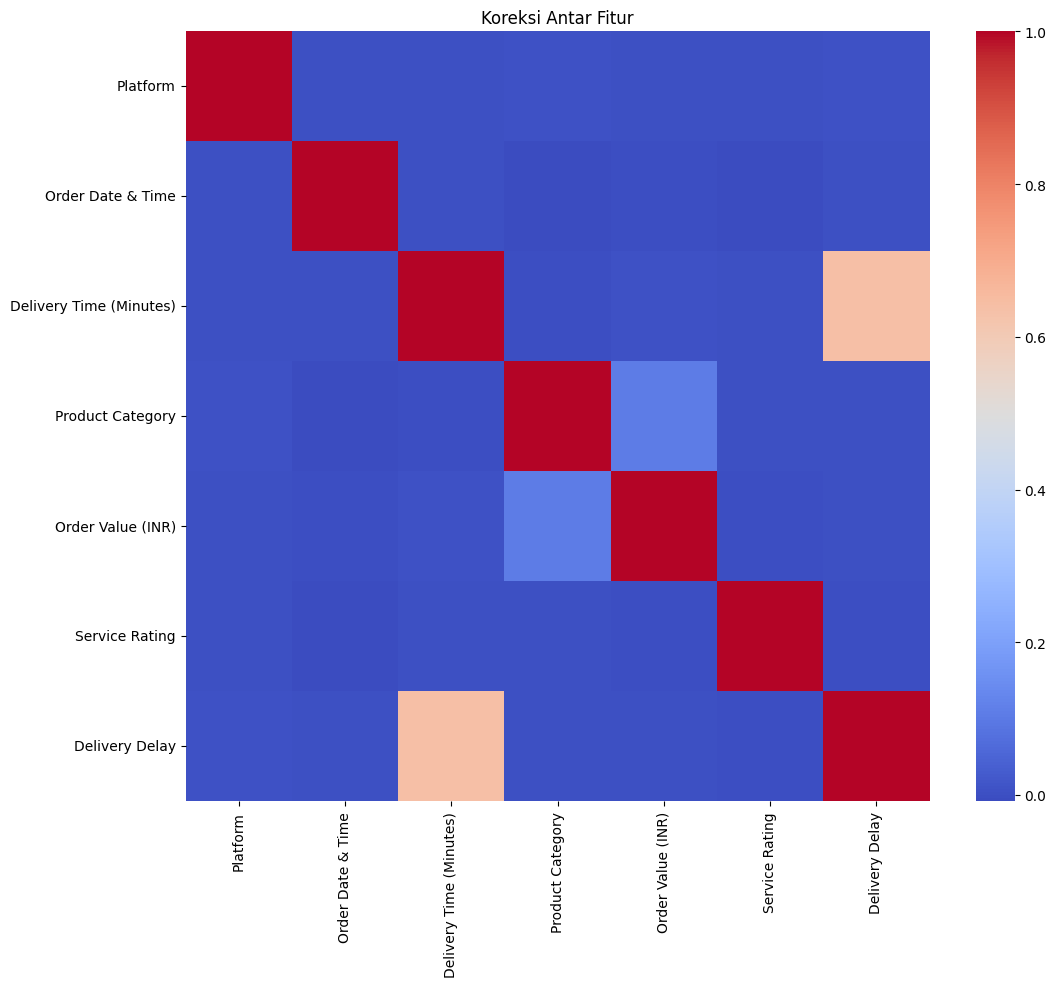

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Koreksi Antar Fitur")
plt.show()

# **SPLITTING DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42, stratify=y)

# **DECISION TREE WITH GRIDSEARCH HYPERPARAMETER TUNING**

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                              param_grid=param_grid_dt,
                                              cv=5,
                                              scoring='accuracy',
                                              verbose=1,
                                              n_jobs=1)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree Accuracy", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Decision Tree Accuracy 1.0

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5418
           1       1.00      1.00      1.00      4582

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# **CONFUSION MATRIX**

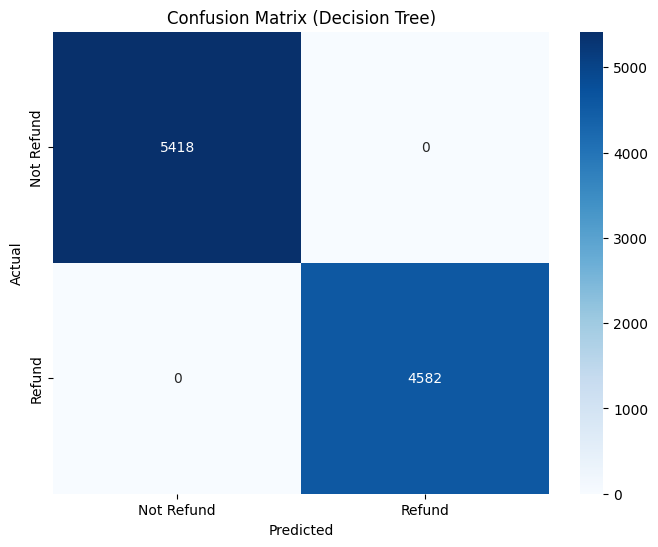

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Refund', 'Refund'], yticklabels=['Not Refund', 'Refund'])
plt.title("Confusion Matrix (Decision Tree)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **DECISION TREE VISUALIZATION**

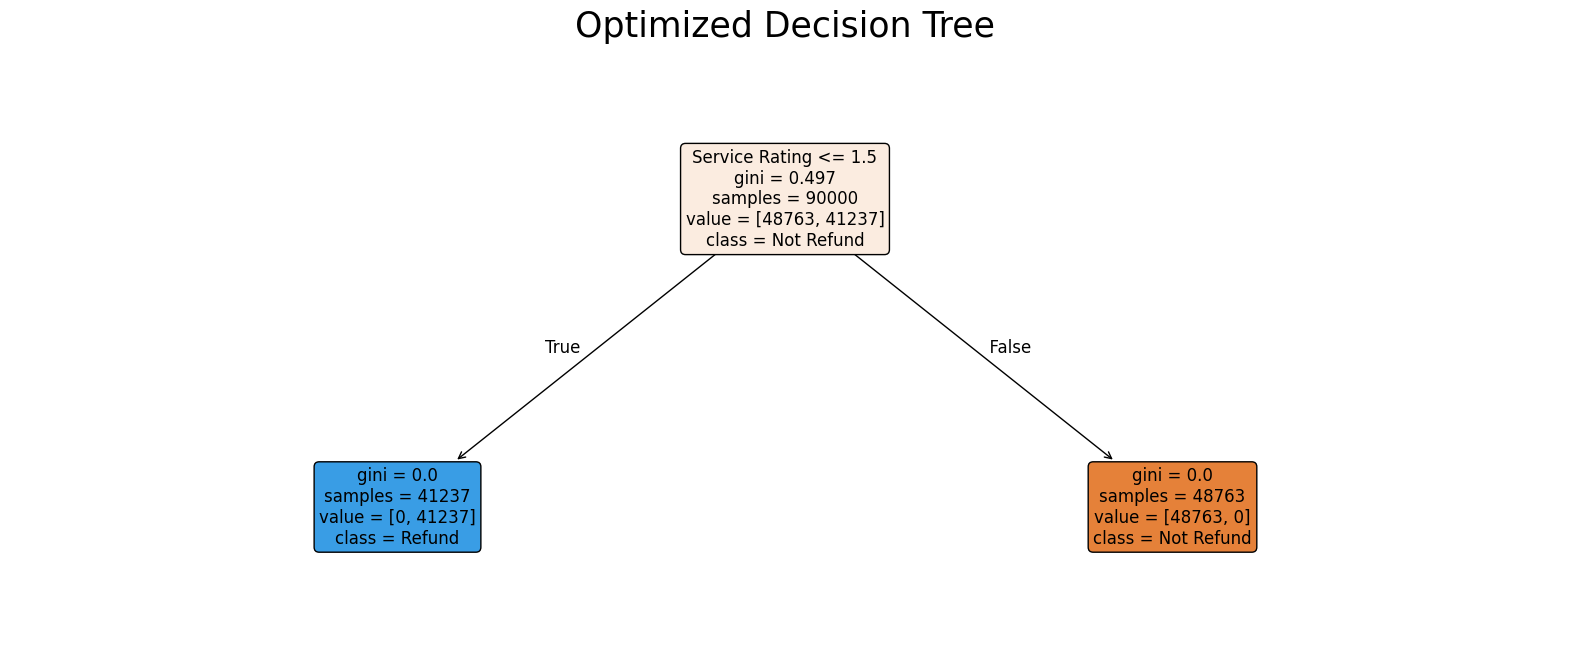

In [ ]:
plt.figure(figsize=(20, 8))
plot_tree(best_dt,
          feature_names=X_train.columns,
          class_names=['Not Refund', 'Refund'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Optimized Decision Tree", fontsize=25)
plt.show()

# **RESULT**

In [ ]:
predicted_distribution = pd.Series(y_pred_dt).value_counts()
actual_distribution = pd.Series(y_test).value_counts()

print("==== Distribusi Prediksi pada Data Testing ====")
print(f"TidakRefund: {predicted_distribution[0]}")
print(f"Refund: {predicted_distribution[1]}")

print("\n==== Distribusi Aktual pada Data Testing ====")
print(f"Tidak Refund: {actual_distribution[0]}")
print(f"Refund: {actual_distribution[1]}")

==== Distribusi Prediksi pada Data Testing ====
TidakRefund: 5418
Refund: 4582

==== Distribusi Aktual pada Data Testing ====
Tidak Refund: 5418
Refund: 4582
